# Dragon real estates

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv('data.csv')

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

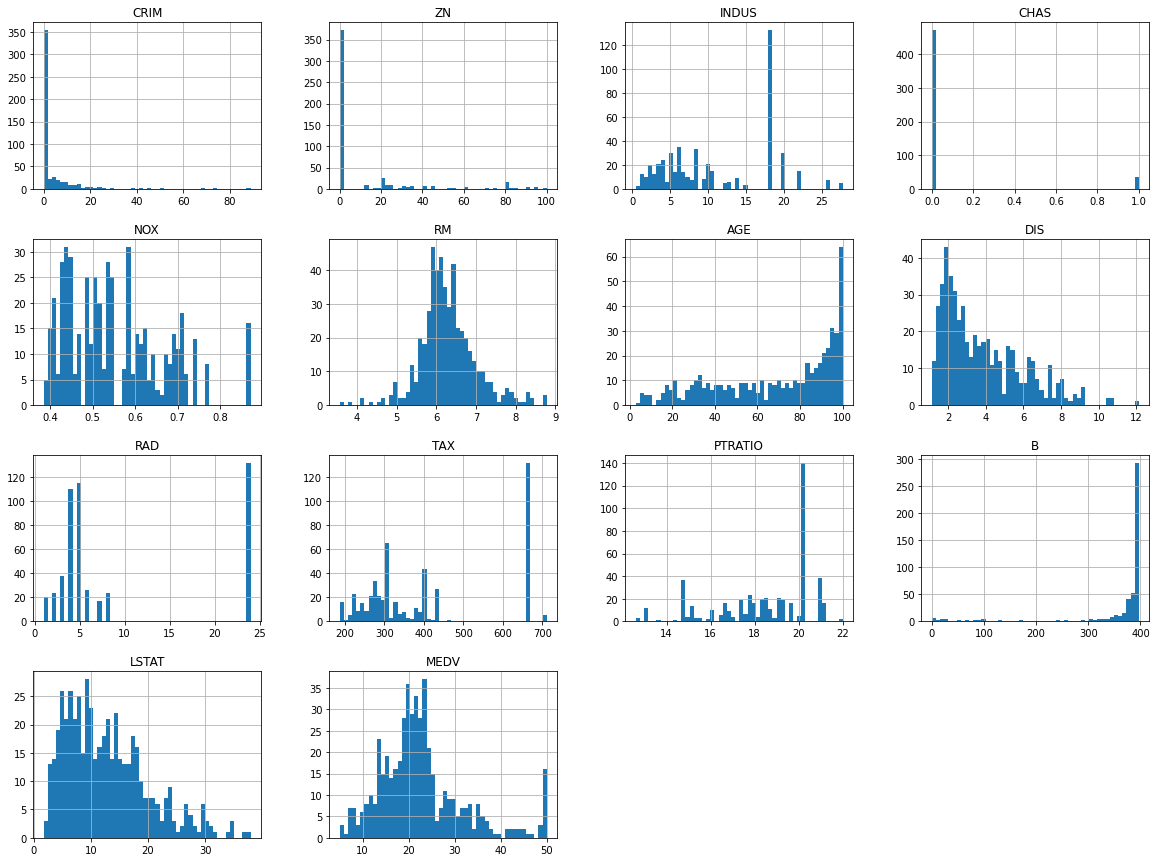

In [9]:
# for plotting the historgrams
housing.hist(bins = 50 , figsize = (20 , 15))

## TRAI  - TEST SPLITTING

In [10]:
import numpy as np 
# for learning purposes
def split_train_test(data , test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices] , data.iloc[test_indices]

In [11]:
train_set , test_set = split_train_test(housing , 0.2)
print(f"Rows in train set : {len(train_set)}\nRows in test set : {len(test_set)}")

Rows in train set : 405
Rows in test set : 101


In [12]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing , test_size = 0.2 , random_state = 42)
print(f"Rows in train set : {len(train_set)}\nRows in test set : {len(test_set)}")

Rows in train set : 404
Rows in test set : 102


In [13]:
# startified shuffle splitting 

from sklearn.model_selection import StratifiedShuffleSplit 
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2 , random_state = 42)
for train_index , test_index in split.split(housing , housing['CHAS']) :
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

# LOOKING FOR CORRELATIONS

In [15]:
corr_matrix = housing.corr()

In [16]:
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

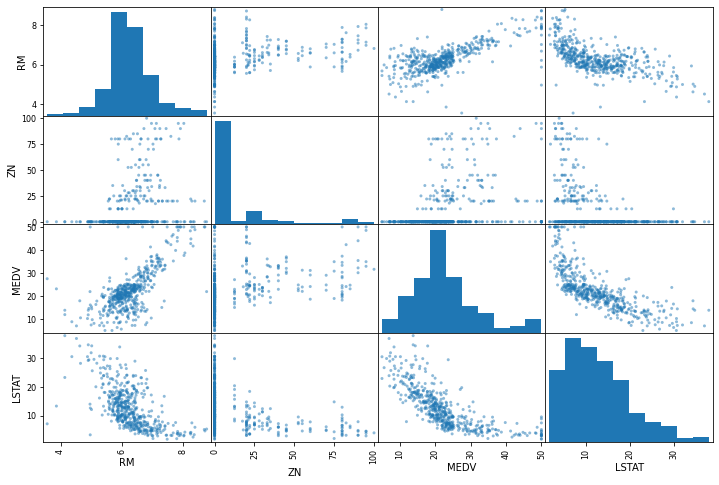

In [17]:
from pandas.plotting import scatter_matrix
attr = ['RM' , 'ZN' , 'MEDV' , 'LSTAT']
scatter_matrix(housing[attr] , figsize = (12 , 8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

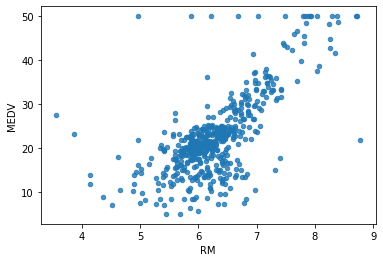

In [18]:
housing.plot(kind = "scatter" , x = "RM" , y = "MEDV" , alpha = 0.8)

## ATTRIBUTE COMBINATIONS

In [19]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [20]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [48]:
corr_matrix = housing.corr()
corr_matrix['LSTAT'].sort_values(ascending = False)

LSTAT      1.000000
INDUS      0.611068
NOX        0.602386
AGE        0.599211
TAX        0.534228
RAD        0.479857
CRIM       0.471442
PTRATIO    0.370759
CHAS      -0.077592
B         -0.405799
ZN        -0.420097
DIS       -0.501408
RM        -0.600731
Name: LSTAT, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

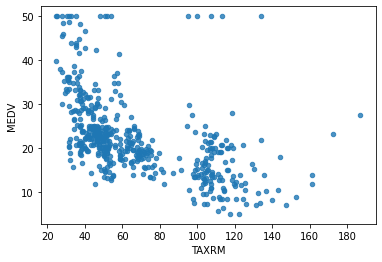

In [22]:
housing.plot(kind = "scatter" , x = "TAXRM", y = "MEDV" , alpha = 0.8)

## MISSING ATTRIBUTES

In [23]:
housing = strat_train_set.drop("MEDV" , axis = 1)
housing_labels = strat_train_set["MEDV"].copy()

In [24]:
# how to take care of missing attributes  , your have 3 options :

# 1. Get rid of the missing attributes 
# 2. Get rid of the whole attributes 
# 3. set the value to some value (mean or median or 0)

In [25]:
a = housing.dropna(subset = ['RM']) # option 1 
a.shape

(404, 13)

In [26]:
housing.drop("RM" , axis = 1) # option 2 
# there is no RM column

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13


In [27]:
median = housing["RM"].median()

In [28]:
housing["RM"].fillna(median) # option 3 

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [30]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [31]:
X = imputer.transform(housing)

In [32]:
housing_tr = pd.DataFrame(X , columns = housing.columns)

In [33]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## SCIKIT_LEARN DESIGN

primarily , three types of objects 

1. Estimators  - it estimates some parameter absed on a dataset . Eg : imputer
    Fit method - fits the dataset and calculated internal parameters
    
2. Transformers - Tranform method takes input and returns output and based from teh learning from fit() . It also has a ocnvenience function 


3. Predictors - linear regression model 

two common funtions : fit and predict 
    
    it also gives score() function which will evaluate the predictions.

## feature scaling 

primarily , two types of feature scaling methods :
    
    1. Min-max scaling (Normalizing)
    (value - min) / (max - min)
    Sklearn provide sa class called MinMaxScaler 
    
   2. Standardization 
   
   (value - mean)/std 
   Sklearn provides a class called StandardScalar 

In [34]:
# creating a pipeline 

from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ("imputer" , SimpleImputer(strategy = 'median')) , 
    ("std_scalar" , StandardScaler()) , 
])

In [35]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

housing_num_tr

## Selecting a desired model for dragon real estate 

In [36]:
housing_num_tr.shape

(404, 13)

In [37]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor  # using second model if the 1st model is not precise and having large rmse error 

linear_model = LinearRegression()
decision_model = DecisionTreeRegressor() 
linear_model.fit(housing_num_tr , housing_labels)
decision_model.fit(housing_num_tr , housing_labels)

DecisionTreeRegressor()

In [38]:
some_data = housing.iloc[:5]

In [39]:
some_labels = housing_labels.iloc[:5]

In [40]:
prepared_data = my_pipeline.transform(some_data)

In [41]:
decision_model.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [42]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [43]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)

lin_mse = mean_squared_error(housing_labels , housing_predictions)
lin_rmse = np.sqrt(lin_mse)

NameError: name 'model' is not defined

In [ ]:
lin_mse

# Using better evaluation technique 

In [ ]:
from sklearn.model_selection import cross_val_score 

scores = cross_val_score(model , housing_num_tr, housing_labels , scoring = "neg_mean_squared_error" , cv = 10 )
rmse_scores = np.sqrt(-scores)

In [ ]:
rmse_scores

In [ ]:
def print_scores(scores):
    print("Scores : " , scores)
    print("Mean :  ",  scores.mean())
    print("Standard deviation : " , scores.std())

In [ ]:
print_scores(rmse_scores)

In [ ]:
from joblib import dump , load 
dump(decision_model , "Dragon.joblib")

In [ ]:
X_test = strat_test_set.drop("MEDV" , axis = 1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test , final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions , list(Y_test))

In [ ]:
final_rmse

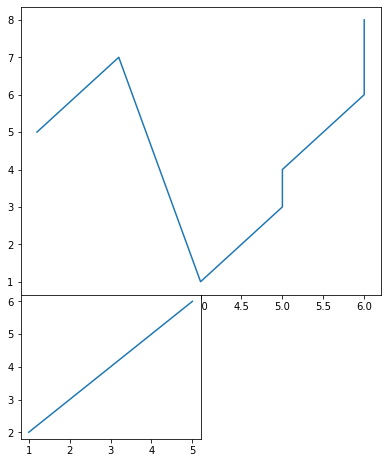

In [53]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
 
# Creating a new figure with width = 5 inches
# and height = 4 inches
fig = plt.figure(figsize =(5, 4))
 
# Creating first axes for the figure
ax1 = fig.add_axes([1 , 0.5 , 1 ,1])
 
# Creating second axes for the figure
ax2 = fig.add_axes([1, 0, 0.5, 0.5])
 
# Adding the data to be plotted
ax1.plot([2, 3, 4, 5, 5, 6, 6],
         [5, 7, 1, 3, 4, 6 ,8])
ax2.plot([1, 2, 3, 4, 5],
         [2, 3, 4, 5, 6])
 
plt.show()